# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives

You will be able to:

* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [4]:
# Load the dataset
df = pd.read_csv("non_normal_dataset.csv")

# If the CSV has only one column, extract it as a Series
if df.shape[1] == 1:  
    df = df.iloc[:, 0]  

# Display the first few rows
print(df.head())

# Check the type to confirm it's a Series
print(type(df))


0     5
1     3
2     3
3     1
4    13
Name: 3, dtype: int64
<class 'pandas.core.series.Series'>


## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sampling distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


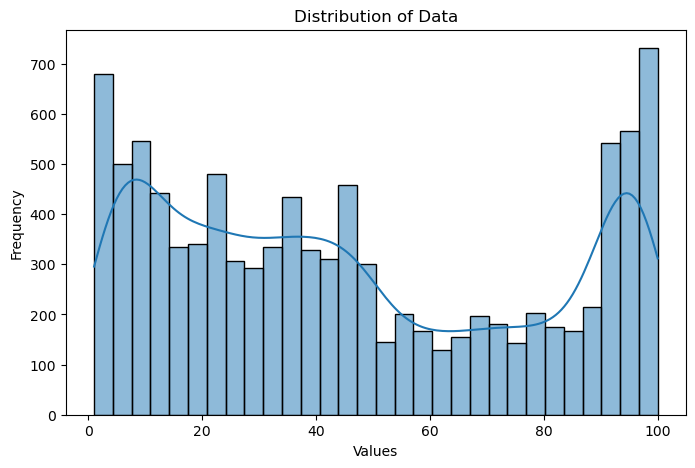

In [5]:
# Your code here
# Visualizing the distribution
plt.figure(figsize=(8, 5))
sns.histplot(df, kde=True, bins=30)  # kde=True overlays a probability density curve

# Labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Data")
plt.show()


As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [6]:
# Your code here
from scipy import stats

# Perform normality test
stat, p_value = stats.normaltest(df)

# Print results
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The dataset is NOT normally distributed (Reject H0).")
else:
    print("The dataset appears to be normally distributed (Fail to reject H0).")


Test Statistic: 43432.8111
P-value: 0.0000
The dataset is NOT normally distributed (Reject H0).


The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sampling Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`. Additionally, we've added a marker for random seed for reproducability. 

In [7]:
def get_sample(data, n, seed=42):
    """
    Returns a random sample of size n from the given data with replacement.

    Parameters:
    - data (array-like): The dataset to sample from.
    - n (int): The size of the sample.
    - seed (int): Random seed for reproducibility (default is 42).

    Returns:
    - np.array: A random sample of size n.
    """
    np.random.seed(seed)  # Set seed for reproducibility
    sample = np.random.choice(data, size=n, replace=True)  # Sample with replacement
    return sample

# Test the function
sample = get_sample(df, 100)  # Get a sample of 100 values
print(sample[:10])  # Print the first 10 sampled values


[60 26  9 37 35 36 32 85 13 21]


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [8]:
def sample_mean(sample):
    """
    Returns the mean of a given sample.

    Parameters:
    - sample (array-like): The sample data.

    Returns:
    - float: The mean of the sample.
    """
    return np.mean(sample)

# Testing the function
test_sample = get_sample(df, 30, 0)  # Get a sample of 30 values
print(sample_mean(test_sample))  # Print the mean of the sample


32.733333333333334


### Creating a Sampling Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sampling distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sampling distribution of sample means of the given size.  

Make sure to include some way to change the seed as your function proceeds!

In [9]:
def create_sampling_distribution(data, num_samples, sample_size, seed=42):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    - data (array-like): The dataset to sample from.
    - num_samples (int): The number of sample means to generate.
    - sample_size (int): The size of each sample.
    - seed (int): Random seed for reproducibility.

    Returns:
    - list: A list of sample means.
    """
    np.random.seed(seed)  # Set the initial random seed
    sample_means = []  # List to store sample means

    for i in range(num_samples):
        np.random.seed(seed + i)  # Change seed for each sample
        sample = get_sample(data, sample_size, seed + i)  # Get a sample
        sample_means.append(sample_mean(sample))  # Compute and store sample mean

    return sample_means

# Testing the function
sampling_dist = create_sampling_distribution(df, num_samples=1000, sample_size=30)
print(sampling_dist[:5])  # Print the first 5 sample means


[44.0, 54.43333333333333, 41.2, 47.8, 38.166666666666664]


## Visualizing the Sampling Distribution as it Becomes Normal

The sampling distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sampling distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sampling distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sampling distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sampling distribution with `displot`.

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


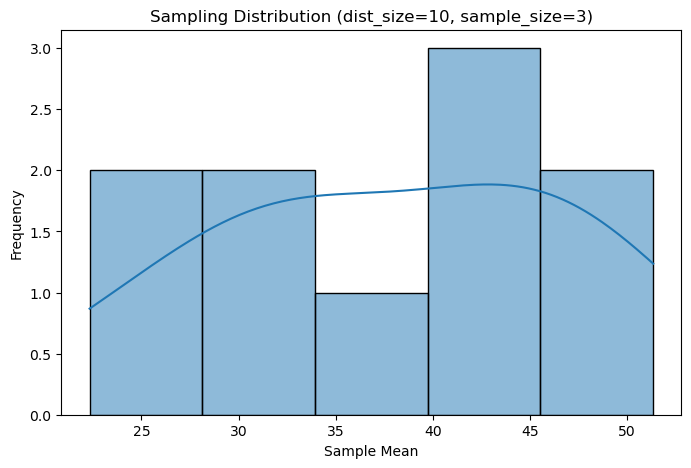

In [10]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a small sampling distribution
small_sampling_dist = create_sampling_distribution(df, num_samples=10, sample_size=3)

# Visualize the sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(small_sampling_dist, kde=True, bins=5)  # KDE for smoothness

# Labels and title
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution (dist_size=10, sample_size=3)")
plt.show()


Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


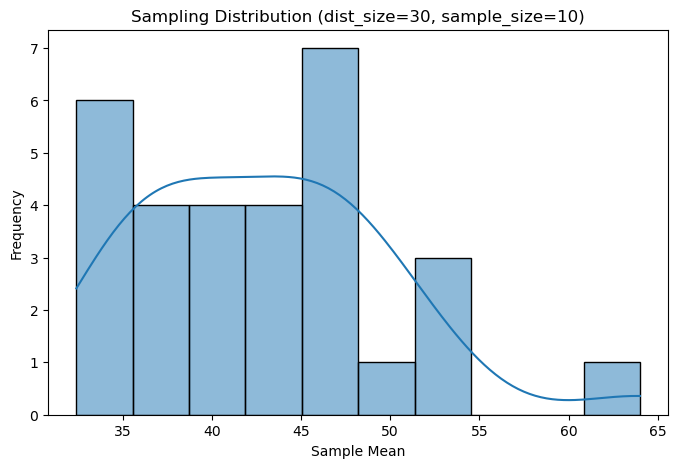

In [11]:
# Your code here
# Create a larger sampling distribution
larger_sampling_dist = create_sampling_distribution(df, num_samples=30, sample_size=10)

# Visualize the new sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(larger_sampling_dist, kde=True, bins=10)  # More bins for better visualization

# Labels and title
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution (dist_size=30, sample_size=10)")
plt.show()


The data is already looking much more 'normal' than the first sampling distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sampling distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


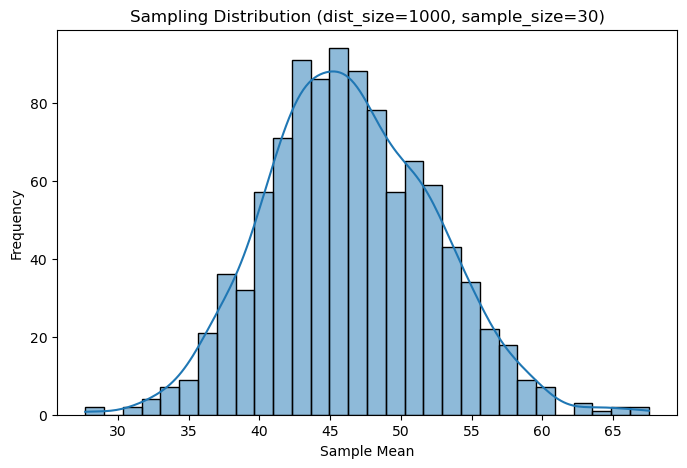

In [12]:
# Your code here
# Create a much larger sampling distribution
large_sampling_dist = create_sampling_distribution(df, num_samples=1000, sample_size=30)

# Visualize the new sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(large_sampling_dist, kde=True, bins=30)  # More bins for smoothness

# Labels and title
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution (dist_size=1000, sample_size=30)")
plt.show()


Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  